# [LEGALST-123] Lab 06: Regression and Causal Inference

This lab will review Ordinary Least Squares regression, the use of regression for causal inference, and interpreting regression models (including the idea of hypothesis testing). The idea here is to review how causal inference models are used in the social sciences (here, with the ANES data) and how to interpret those models.

In [8]:
# Just run this cell
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

**Helpful resource**:


*   [python reference table](https://www.data8.org/fa23/reference/)
*   [data 8 textbook - Regression](https://inferentialthinking.com/chapters/15/2/Regression_Line.html?highlight=regression)

## Data

The data we are exploring is collected from a bike sharing system in Washington D.C.

In [9]:
# Run this cell to load the data, no further action is needed
bike = pd.read_csv("https://github.com/ds-modules/data/raw/main/bikeshare.txt")
# Note that we're taking a random sample of the dataset since our dataset is large.
bike = bike.sample(n=1000, random_state=42).reset_index(drop=True)
bike.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,12831,2012-06-23,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,185,240,425
1,8689,2012-01-02,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,5,83,88
2,7092,2011-10-28,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,1,3,4
3,12231,2012-05-29,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,69,457,526
4,432,2011-01-20,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5,8,13
5,1087,2011-02-18,1,0,2,0,0,5,1,1,0.44,0.4394,0.72,0.2836,12,20,32
6,11606,2012-05-03,2,1,5,18,0,4,1,1,0.72,0.6667,0.58,0.1343,64,642,706
7,7984,2011-12-04,4,0,12,7,0,0,0,1,0.26,0.3030,0.87,0.0000,3,23,26
8,10392,2012-03-14,1,1,3,2,0,3,1,1,0.50,0.4848,0.68,0.1940,0,2,2
9,7047,2011-10-26,4,0,10,5,0,3,1,1,0.42,0.4242,0.71,0.2239,0,21,21


The variables in this data frame are defined as:

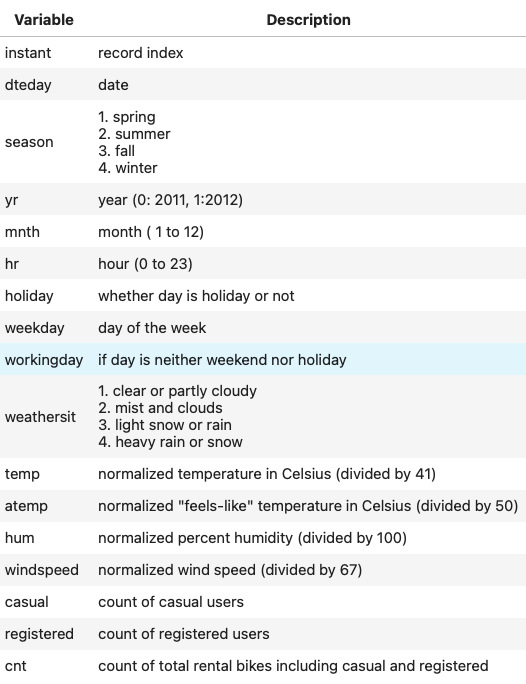

## A Note on Data Preparation

Reflecting back on Lab 3, it’s crucial to remember the importance of cleaning our dataset to enhance the quality of our analysis.

Below are some strategies that could be beneficial:
1. Addressing Missing Data
  *   Identify and handle missing data points to ensure they don’t negatively impact our analysis.
  *   This could involve removing or imputing missing values depending on the situation.

2. Recode Categorical Variables
  *   Transform categorical variables into dichotomous variables, taking on values of 0 or 1, to simplify the analysis and interpretation.

3. Standardize Scale
  *   Ensure that all scales are recoded in a consistent direction, enhancing the interpretability of our results.

## Simple Linear Regression

Recall from Data 8 that the least-squares regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error.

For this question, we're going to explore the relationship between Temperature (`temp`) and Count (`cnt`). Let's do a simple linear regression with 'temp' as a predictor for 'cnt'

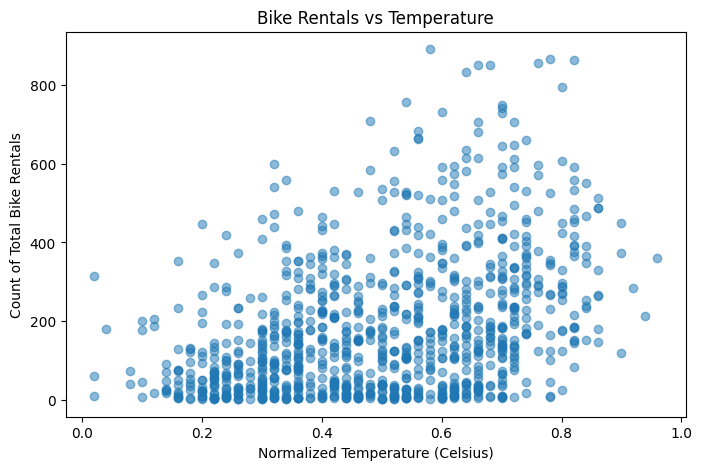

In [10]:
# Assuming the DataFrame is named 'bike', already loaded with data
# Preparing the data for modeling
X = bike[['temp']]  # Predictor
Y = bike['cnt']     # Response

# Creating a scatter plot to visualize the data (without OLS Model First)
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.5)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature (Celsius)')
plt.ylabel('Count of Total Bike Rentals')
plt.show()

In order to fit the linear regression model, we use the linear regression method from the Sklearn package. First, define your model as a linear regression by calling the method, then fit your data with a predictor (X) and response (Y) variable. You can then predict upon predictor (X) variable.

Here are the full, simplified steps to performing Ordinary Least Squares (OLS) regression:


1. Choose Your Variables
  * Decide on which variable you want to predict (the dependent variable) and which variables you will use to predict it (the independent variables).
2. Gather Data
  * Collect the data for all the variables you have decided to use. Ensure there are no missing values and that the data is clean.
3. Visualize Data
  * Plot the data to get a sense of the relationship between the independent and dependent variables. Look for trends, patterns, and potential outliers.
4. Fit the Model
  * Use the OLS method to find the coefficients that minimize the sum of the squares of the residuals (the differences between the observed values and the values predicted by the model).
5. Analyze Results
  * Examine the coefficients to see how changes in the independent variables are expected to affect the dependent variable. Check the R-squared value to see how well the model explains the variability of the dependent variable.
6. Diagnostic Checks
  * Perform diagnostic tests to ensure the model assumptions are not violated. This may include checking for linearity, homoscedasticity, independence, and normality of residuals.
7. Make Predictions
  * Use the model to make predictions on new data, applying the coefficients to the independent variables to get predicted values for the dependent variable.
8. Evaluate the Model
  * Assess the model's performance using metrics like RMSE (Root Mean Squared Error) and validate it on a test dataset to ensure that it generalizes well to unseen data.

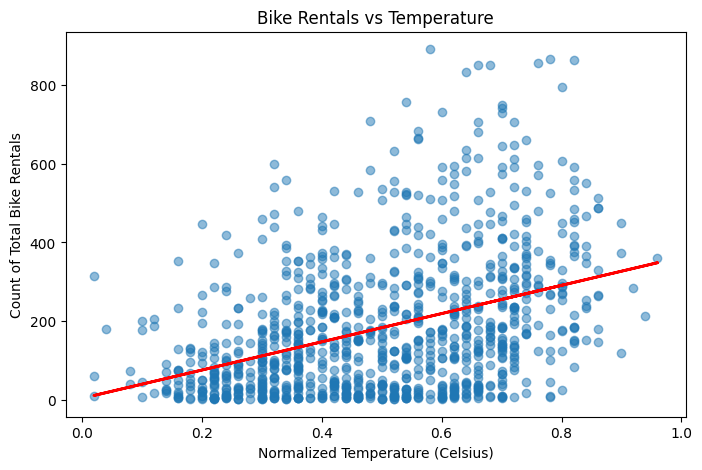

Coefficient (slope): 359.59619217841794
Intercept: 3.268247838209277
Root Mean Squared Error: 160.58580823880143


In [12]:
# Fitting the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Making predictions
y_pred = model.predict(X)

# Plotting the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.5)  # actual points
plt.plot(X, y_pred, color='red', linewidth=2)  # regression line
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature (Celsius)')
plt.ylabel('Count of Total Bike Rentals')
plt.show()

# Output the model coefficients
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Calculating and printing RMSE
rmse = mean_squared_error(Y, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


#### Analysis of Simple Linear Regression Results

The coefficient, also known as the slope, indicates the change in the count of total bike rentals for each unit increase in normalized temperature. The positive value suggests a direct relationship between temperature and bike rentals. The intercept represents the expected count of bike rentals when the temperature is 0.

However, it is important to consider the assumptions behind linear regression when interpreting these results. The main assumptions include linearity, independence, homoscedasticity, and normal distribution of residuals. If any of these assumptions do not hold, the predictions and inferences made from the model may be unreliable. Therefore, further analysis and diagnostics are necessary to validate these assumptions.


## Multi-Variable Regression Models

#### Now that we've learned how to build OLS model, let's try it ourselves!

In [ ]:
# Multiple Linear Regression (OLS)

# Choosing a subset of variables for the multiple regression model
features = ['temp', 'hum', 'windspeed', 'season', 'weathersit']  # example feature set
X_multi = bike[features]
y_multi = bike['cnt']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the multiple regression model
model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_multi = model_multi.predict(X_test_scaled)

# Evaluating the model
rmse_multi = mean_squared_error(y_test, y_pred_multi, squared=False)
print(f"Root Mean Squared Error (Multiple Regression): {rmse_multi}")


Root Mean Squared Error (Multiple Regression): 145.7683078695741


Let's draw some plots to further our analysis. This time, we're going to focus on drawing scatter plots for continuous variables.

Remember that:


*   Continous variables can take any value within a range (e.g., temperature, height).
*   Discrete variables can only take specific, separate values (e.g., count of people, number of cars).



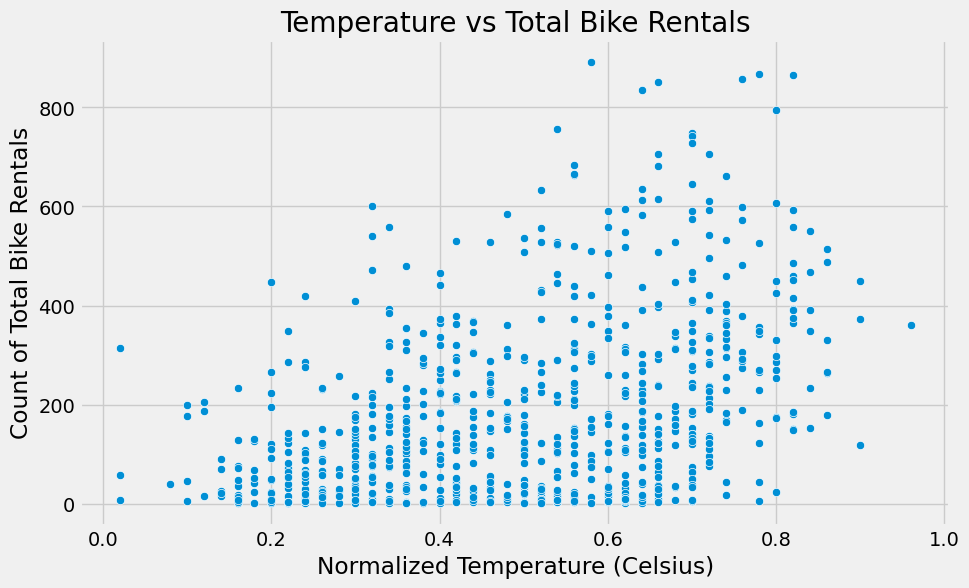

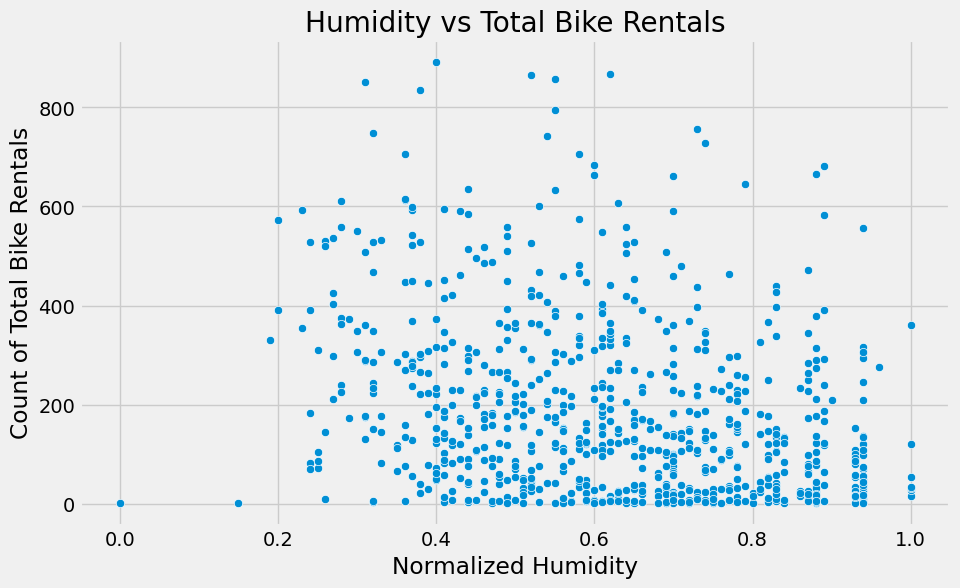

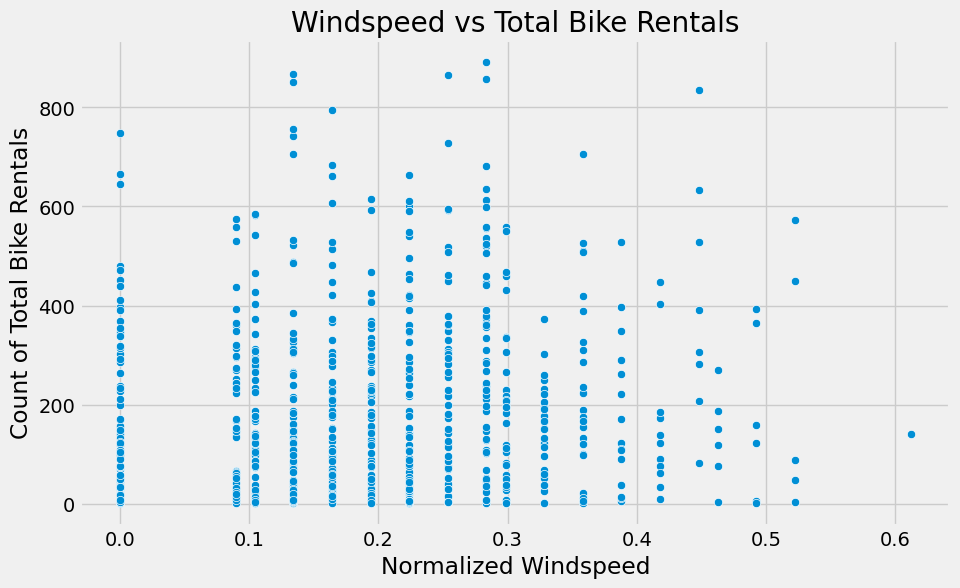

In [ ]:
# Scatter plot for 'temp' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['temp'], y=y_train)
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Normalized Temperature (Celsius)')
plt.ylabel('Count of Total Bike Rentals')
plt.show()

# Scatter plot for 'hum' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['hum'], y=y_train)
plt.title('Humidity vs Total Bike Rentals')
plt.xlabel('Normalized Humidity')
plt.ylabel('Count of Total Bike Rentals')
plt.show()

# Scatter plot for 'windspeed' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['windspeed'], y=y_train)
plt.title('Windspeed vs Total Bike Rentals')
plt.xlabel('Normalized Windspeed')
plt.ylabel('Count of Total Bike Rentals')
plt.show()




## Try Your Own Model on the Dataset!

✅ Q. Now that we've run through a causal model that aims at explanation of receptiveness to scientific information, try one of your own. Come up with a explanatory model for the bike rentals dataset. In a markdown cell, outline the model, and in another markdown cell, describe what you have found.

_Your model in words:_<br>

In [ ]:
# implement your model here, commenting on the steps you take to clean the data and make the variables
# ready for use in an OLS regression model

_Description of what you found (and a negative finding is still a finding)_<br>

## OLS regression: making an inference from data

In the social sciences, regression is often used to support a causal argument based in some kind of theory of human action.
In effect, what it represents mathematically is "what is the effect of a unit change in  𝑥  (the cause of interest) on  𝑦  (the outcome of interest), holding everything else equal."
Another way of thinking about it is as the partial correlation between a single variable  𝑥  and an outcome  𝑦 .
Correlation and regression are introduced quite well in the Adhikari and DeNero text, so here we are trying to show how social scientists use regression to make causal arguments. We are going to use some simple examples with the ANES data we have already used.

There are a number of assumptions that regression techniques require that we will keep returning to in class. Here's a little list.
independent variables are quantitative or dichotomous; dependent variable is quantitative, continuous, and unbounded
all IVs have variance not equal to 0 (ie. there is some variation in their value) (duh, otherwise they’d be constants)
no perfect multicollinearity between any two IVs
for each set of values for the independent variables, the mean value of the error term is zero
each IV is uncorrelated with the error term
the variance of the error term for each set of values for the IVs is constant (homoskedasticity assumption)
error terms for any two observations of the values of IVs are uncorrelated
error terms for each set of values for the IVs are normally distributed
This means we have some work to do first with the variables in our model.